In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import time

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers, regularizers

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import sherpa #AutoML

from sklearn.preprocessing import MinMaxScaler, StandardScaler

print("Tesorflow Version:", tf.__version__)
print("Keras Version:",tf.keras.__version__)

Tesorflow Version: 2.0.0
Keras Version: 2.2.4-tf


In [3]:
path=""
best_model = tf.keras.models.load_model(path + "best_model.h5")

In [4]:
path="../"
df = pd.read_csv(path + "time_series_dataset.csv", sep=";", decimal=".")
df.Data = pd.to_datetime(df.Data)
df.head()

,Data,value
0,2010-01-01,41.651044
1,2010-01-02,131.286604
2,2010-01-03,117.388117
3,2010-01-04,116.461280
4,2010-01-05,123.823765


In [5]:
train = df[df.Data <= pd.to_datetime("2017-06-30")]
val  = df[df.Data  > pd.to_datetime("2017-06-30")]

x_scaler = StandardScaler().\
            fit(np.array(train.value).reshape(-1,1))

train_scaled = x_scaler.transform(np.array(train.value).reshape(-1,1))
val_scaled = x_scaler.transform(np.array(val.value).reshape(-1,1))

data_scaled = np.concatenate((train_scaled, val_scaled))

In [6]:
def sliding_windows(data, seq_length, pred_lenght):
    x = []
    y = []

    for i in range(len(data)-seq_length-pred_lenght-1):
        x.append(data[i:(i+seq_length)])
        y.append(data[i+seq_length:i+seq_length+pred_lenght])

    return np.array(x),np.array(y)

In [7]:
INPUT_SIZE = 365*2 #2 years
OUTPUT_SIZE = 365


slides = sliding_windows(data_scaled, 
                         INPUT_SIZE ,OUTPUT_SIZE)

X = slides[0].reshape(slides[0].shape[0],
                            slides[0].shape[1],
                           1)
y = slides[1]

X_train, X_val = X[:-184], X[-184:]
y_train, y_val = y[:-184], y[-184:]

In [8]:
best_model.evaluate(X_train, y_train)
best_model.evaluate(X_val, y_val)

184/184 [==============================] - 1s 3ms/sample - loss: 0.6352 - mean_absolute_error: 0.5742


[0.635151163391445, 0.57422584]

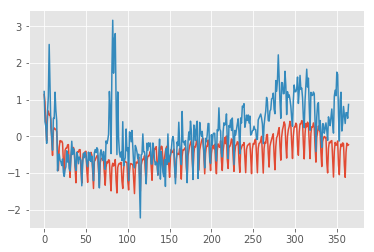

In [9]:
i=160

plt.plot(best_model.predict(X_val)[i])
plt.plot(y_val[i])

In [10]:
pred = best_model.predict(X_val)

In [11]:
valid = x_scaler.inverse_transform(y_val).reshape(y_val.shape[0],y_val.shape[1])
pred = x_scaler.inverse_transform(pred)


In [12]:
np.mean(list(map(np.mean,np.abs(pred - valid)/np.abs(valid))))

0.14535552741659702

In [23]:
path=""
best_model_2 = tf.keras.models.load_model(path + "best_model_2.h5")

best_model_2.evaluate(X_train, y_train)
best_model_2.evaluate(X_val, y_val)

184/184 [==============================] - 1s 3ms/sample - loss: 0.7115 - mean_absolute_error: 0.6294


[0.7114577630291814, 0.6293735]

MAPE: 0.1616835760214879


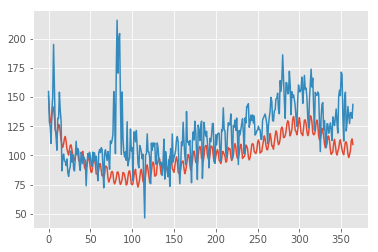

In [24]:
pred = best_model_2.predict(X_val)
valid = x_scaler.inverse_transform(y_val).reshape(y_val.shape[0],y_val.shape[1])
pred = x_scaler.inverse_transform(pred)

print("MAPE:",np.mean(list(map(np.mean,np.abs(pred - valid)/np.abs(valid)))))

i=160

plt.plot(pred[i])
plt.plot(valid[i])
plt.show()

In [25]:
path=""
best_model_3 = tf.keras.models.load_model(path + "best_model_2.h5")

best_model_3.evaluate(X_train, y_train)
best_model_3.evaluate(X_val, y_val)

pred = best_model_3.predict(X_val)
valid = x_scaler.inverse_transform(y_val).reshape(y_val.shape[0],y_val.shape[1])
pred = x_scaler.inverse_transform(pred)

184/184 [==============================] - 1s 3ms/sample - loss: 0.7115 - mean_absolute_error: 0.6294


MAPE: 0.1616835760214879


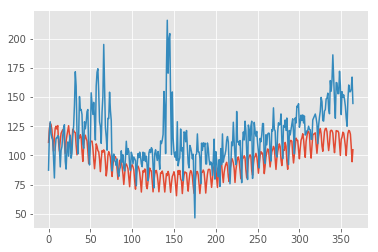

In [28]:
print("MAPE:",np.mean(list(map(np.mean,np.abs(pred - valid)/np.abs(valid)))))

i=100

plt.plot(pred[i])
plt.plot(valid[i])
plt.show()